C:\Users\안효준\AppData\Local\Temp\ipykernel_1184\1063130950.py:31: RuntimeWarning: overflow encountered in scalar power
  z = c_val ** z


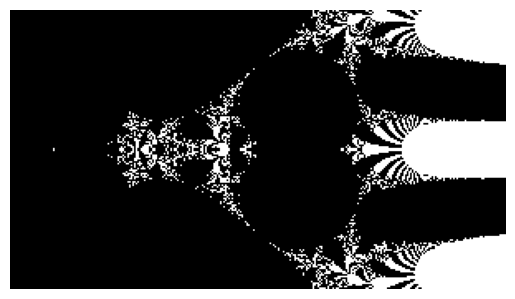

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#parameters - plot영역설정관련
x0 = 0
y0 = 0 #(x0,y0) : plot영역 중심좌표
eps = 5e0 #x0 좌우로 eps만큼 plot함
eps_y = eps * (9/16)  # 16:9 비율에 맞추기 위해 y축 eps 계산
n = 300 #화소수조절을 위한 parameter (3840:4K, 1920:Full HD)
nx, ny = n, int(n*(9/16)) #nx, ny : x,y축 화소수

#parameters - tetration계산 관련
max_iter = 500 #최대 몇층까지 계산할 것인지를 정함. max_iter층 만큼 계산했는데 복소수 크기가 escape_radius를 벗어나지 않으면 수렴한것으로 처리.
escape_radius = 1e+10 #복소수크기가 escape_radius를 벗어나면 발산한 것으로 처리함.

#tetration 계산을 위한 함수설정
def compute_tetration_divergence(nx, ny, max_iter, escape_radius):
    x = np.linspace(x0 - eps, x0 + eps, nx)
    y = np.linspace(y0 - eps_y, y0 + eps_y, ny)
    c = x[:, np.newaxis] + 1j * y[np.newaxis, :]

    divergence_map = np.zeros_like(c, dtype=bool)

    for i in range(nx):
        for j in range(ny):
            c_val = c[i, j]
            z = c_val

            for k in range(max_iter):
                z = c_val ** z
                if np.abs(z) > escape_radius:
                    divergence_map[i, j] = True
                    break

    return divergence_map

#tetration 계산
divergence_map = compute_tetration_divergence(nx, ny, max_iter, escape_radius)

#plot
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["black", "white"]) # 커스텀 컬러맵 생성: 발산은 흰색, 수렴은 검은색
plt.imshow(divergence_map.T, extent=[x0 - eps, x0 + eps, y0 - eps_y, y0 + eps_y], origin='lower', cmap=cmap)
plt.axis('off')  # 축 라벨과 타이틀 제거
filename = f"mytetration_x_{x0}_y_{y0}_eps_{eps}.png"
plt.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()